# Loan credit default

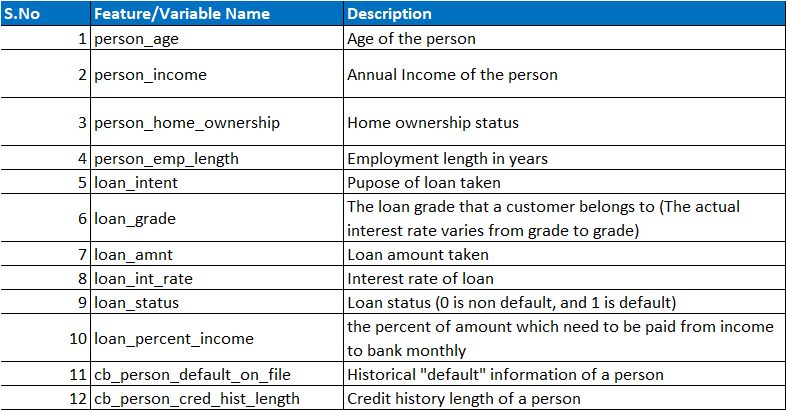

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('FA Test.csv')
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
dataset.shape

(32581, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
dataset.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


 ### Missing values

In [8]:
# Percentage values missing from dataset
na_cols = dataset.isnull().sum().div(len(dataset)).mul(100)
na_cols

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

<AxesSubplot:>

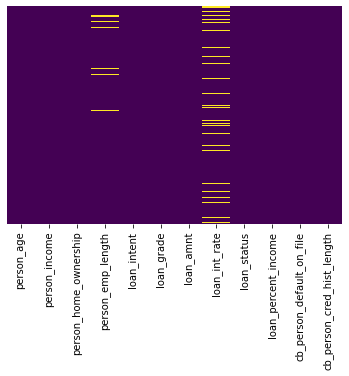

In [9]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# splitting numerical variables
numerical_cols = [features for features in dataset.columns if dataset[features].dtypes != 'O']

numerical_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [11]:
categorical_cols = [features for features in dataset.columns if dataset[features].dtypes=='O']
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [12]:
tmp = dataset['loan_status'].value_counts().div(len(dataset)).mul(100)
tmp

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

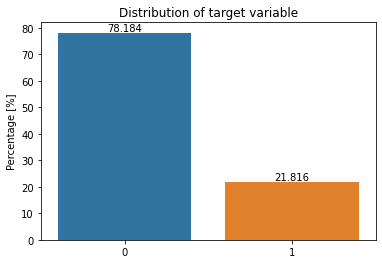

In [13]:
ax = sns.barplot(x=tmp.index,y=tmp.values)
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('Distribution of target variable')
plt.ylabel('Percentage [%]')
plt.show()

 - From here we can see about 78% of our data has no defaulters and 21% are the defaulters

In [14]:
discrete_feature = [feature for feature in numerical_cols if dataset[feature].nunique()<25]
print('Discrete variables : {}'.format(len(discrete_feature)))

Discrete variables : 1


In [15]:
discrete_feature

['loan_status']

In [16]:
continuous_feature = [feature for feature in numerical_cols if feature not in discrete_feature]
print('Continuous variables : {}'.format(len(continuous_feature)))


Continuous variables : 7


In [17]:
continuous_feature

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

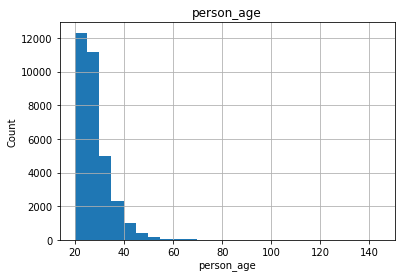

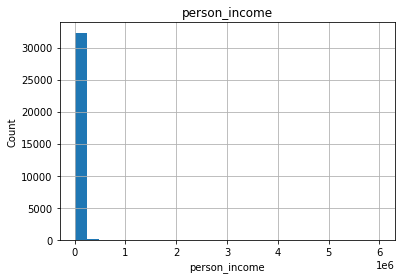

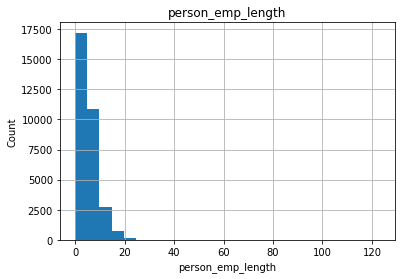

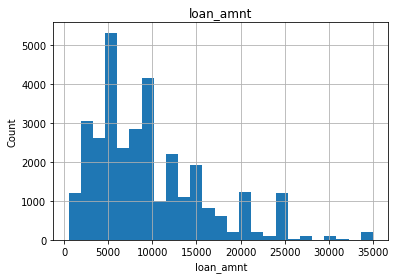

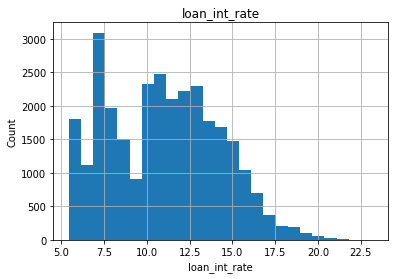

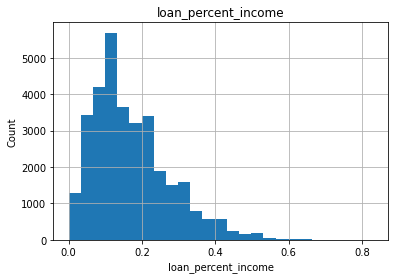

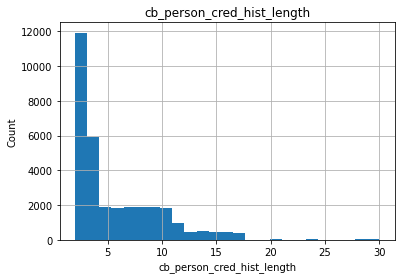

In [18]:
# analysing continuous variables by creating histograms

for feature in continuous_feature:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Since histplots we made are skewed, we will have to perform standardization

In [ ]:
sns.pairplot(dataset,hue='loan_status')

### Outliers

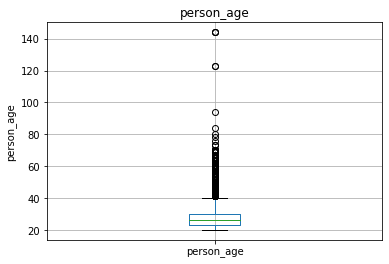

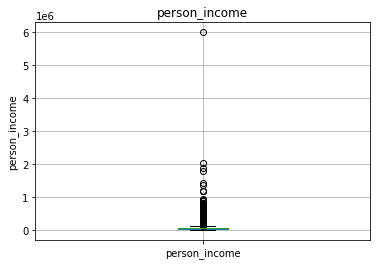

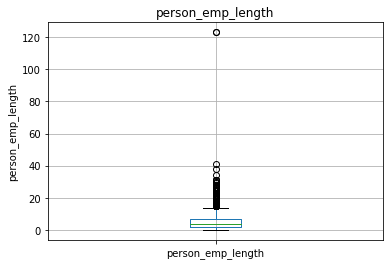

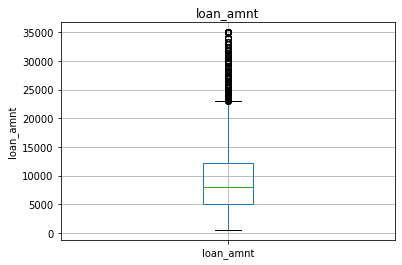

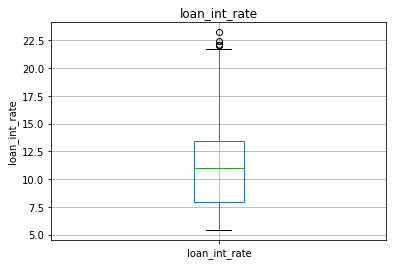

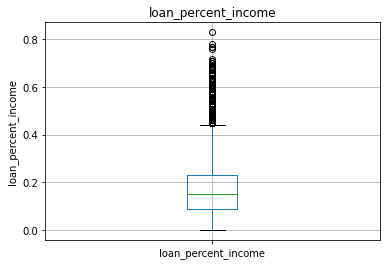

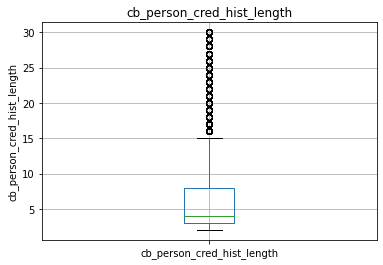

In [19]:
for feature in continuous_feature:
    data = dataset.copy()
    #data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [20]:
# Dropping rows where persons age is greater than 100
dataset[dataset['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [21]:
# Dropping above 5 rows
data = dataset.copy()
data.drop(data[data.person_age>100].index,inplace=True)

data[data['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [22]:
# Dropping rows where person_emp_length > 60 years
dataset[dataset['person_emp_length']>60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [23]:
# Dropping above 2 rows

data.drop(data[data.person_emp_length>60].index,inplace=True)

data[data['person_emp_length']>60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


### Categorical Variables

In [24]:
dataset[categorical_cols].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [25]:
for feature in categorical_cols:
    print(feature,len(dataset[feature].unique()))

person_home_ownership 4
loan_intent 6
loan_grade 7
cb_person_default_on_file 2


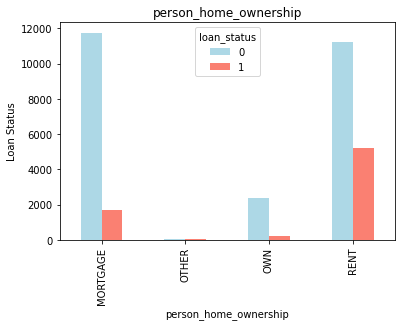

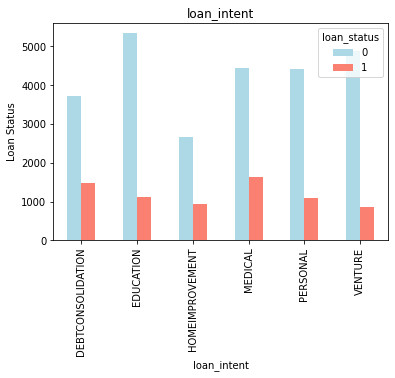

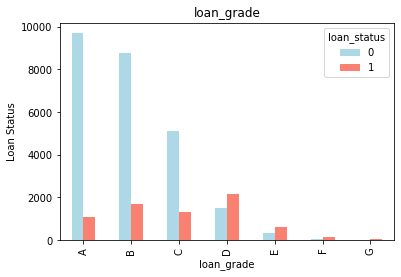

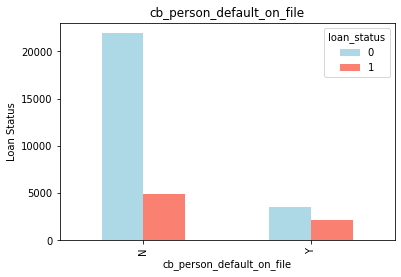

In [26]:
# finding relation ship between categorical and dependent variable

for feature in categorical_cols:
    data = dataset.copy()
    pd.crosstab(data[feature],data.loan_status).plot(kind='bar',color=['lightblue','salmon'])
    plt.xlabel(feature)
    plt.ylabel('Loan Status')
    plt.title(feature)
    plt.show()

From this we can easily visualize which type of categorical variable corresponds to maximum defaulters

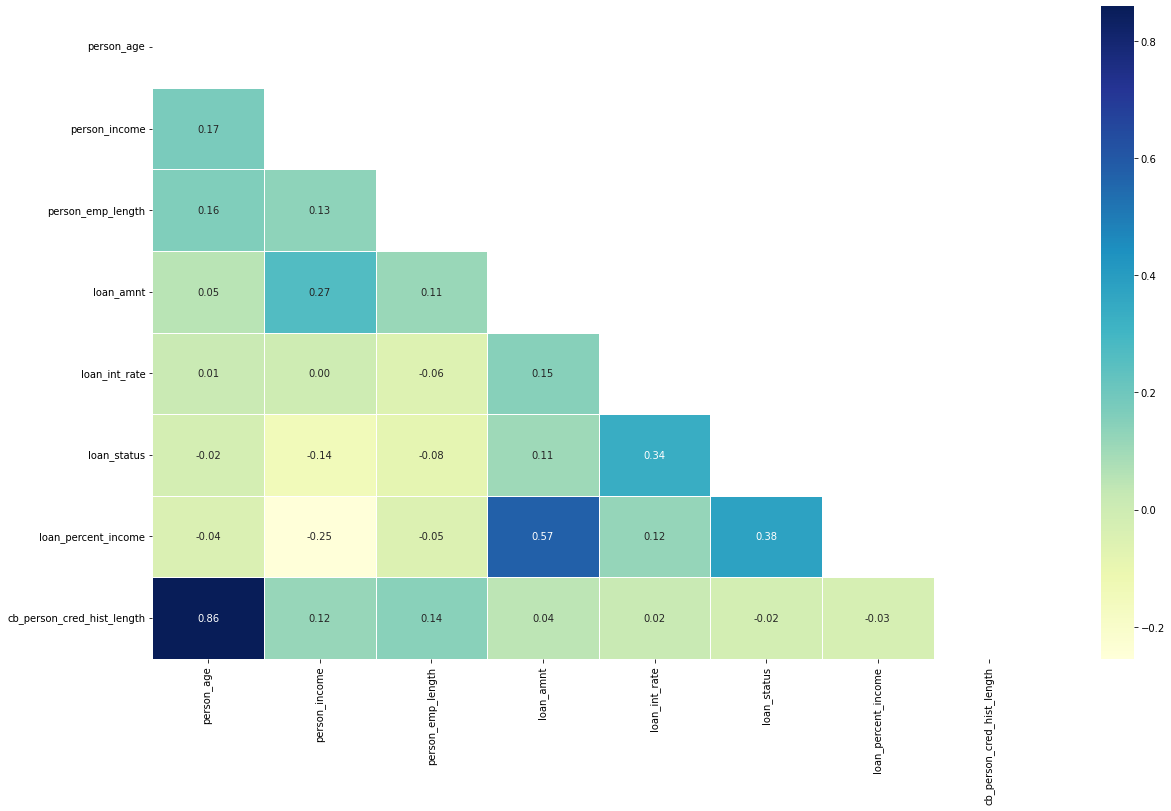

In [27]:
corr_matrix = dataset.corr()
mask = np.triu(np.ones_like(corr_matrix))
fig,ax = plt.subplots(figsize=(20,12))
ax = sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True,fmt='.2f',linewidth=0.5,mask=mask)

Many things can be derived from above correlation matrix such as:
 - person_age and cb_person_cred_hist_length
 - loan_amt and loan_percent_income
 - loan_status and loan_int_rate
 - loan_status and loan_percent_income are highly correlated

### Handling missing values in dataset


In [28]:
numerical_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1]
numerical_with_nan

['person_emp_length', 'loan_int_rate']

In [29]:
for feature in numerical_with_nan:
    median_value = data[feature].median()
    
    data[feature+'nan'] = np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)

data[numerical_with_nan].isnull().sum()

person_emp_length    0
loan_int_rate        0
dtype: int64

In [30]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_lengthnan,loan_int_ratenan
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0


In [31]:
from sklearn.model_selection import train_test_split

x = data.drop(['loan_status'],axis=1)
y = data['loan_status']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22806, 13), (9775, 13), (22806,), (9775,))

### Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[continuous_feature])
scaler.fit(x_test[continuous_feature])

StandardScaler()

In [33]:
x_train[continuous_feature] = scaler.fit_transform(x_train[continuous_feature])
x_test[continuous_feature] = scaler.transform(x_test[continuous_feature])

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [34]:
x_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_lengthnan,loan_int_ratenan
12657,-0.429525,0.003400,MORTGAGE,1.039728,MEDICAL,A,-1.251181,-1.380956,-1.406005,N,-0.446812,0,0
11611,-0.897051,0.137442,MORTGAGE,0.302452,MEDICAL,B,2.441096,-0.570190,1.494059,N,-0.940239,0,0
18223,0.505526,0.605816,RENT,-0.680583,MEDICAL,D,2.322246,1.403000,0.277903,N,-0.200099,0,0
24772,1.128893,0.137442,MORTGAGE,0.056693,PERSONAL,B,-0.728240,-0.749275,-0.938253,N,0.786754,0,0
30770,1.284735,-0.016629,MORTGAGE,0.302452,EDUCATION,C,2.175664,1.389976,1.774711,Y,2.020321,0,0


In [35]:
x_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_lengthnan,loan_int_ratenan
14668,-0.585367,-0.586689,OWN,0.302452,HOMEIMPROVEMENT,B,0.064094,-0.205508,1.774711,N,-0.940239,0,0
24614,-0.117841,-0.032036,RENT,-1.172101,PERSONAL,C,0.064094,1.389976,-0.096299,Y,1.033468,0,0
11096,-0.273683,0.091221,MORTGAGE,1.285486,EDUCATION,D,1.014895,-0.003630,0.465004,N,-0.693526,0,1
10424,-0.741209,-0.586751,RENT,0.548210,DEBTCONSOLIDATION,A,0.064094,-0.003630,1.774711,N,-0.940239,0,1
26007,0.349684,-0.332473,RENT,-0.680583,MEDICAL,E,0.539494,1.731865,1.119857,N,0.046614,0,0


In [36]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(x_train[categorical_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(x_test[categorical_cols]))

OH_cols_train.index = x_train.index
OH_cols_test.index = x_test.index

num_x_train = x_train.drop(categorical_cols,axis=1)
num_x_test = x_test.drop(categorical_cols,axis=1)

OH_x_train = pd.concat([num_x_train,OH_cols_train],axis=1)
OH_x_test = pd.concat([num_x_test,OH_cols_test],axis=1)



In [37]:
OH_x_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_emp_lengthnan,loan_int_ratenan,0,...,9,10,11,12,13,14,15,16,17,18
12657,-0.429525,0.003400,1.039728,-1.251181,-1.380956,-1.406005,-0.446812,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11611,-0.897051,0.137442,0.302452,2.441096,-0.570190,1.494059,-0.940239,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18223,0.505526,0.605816,-0.680583,2.322246,1.403000,0.277903,-0.200099,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
24772,1.128893,0.137442,0.056693,-0.728240,-0.749275,-0.938253,0.786754,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30770,1.284735,-0.016629,0.302452,2.175664,1.389976,1.774711,2.020321,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
y_train.shape

(22806,)

### Modeling

In [39]:
# models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [40]:
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [41]:
%%time
model_scores = fit_and_score(models=models,
                            x_train=OH_x_train,
                            x_test=OH_x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Wall time: 15 s


{'Logistic Regression': 0.8649616368286445,
 'KNN': 0.8913554987212277,
 'Random Forest': 0.9332992327365729}

### Model Comparison

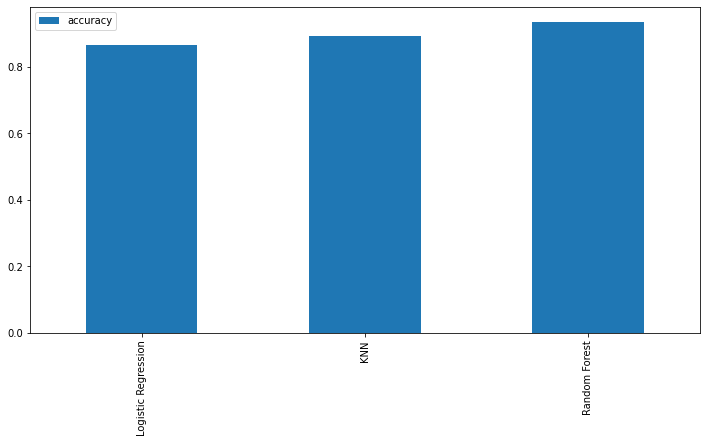

In [42]:
plt.rcParams['figure.figsize'] = (12,6)
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

From current observation Random Forest have scored greatest among others on test data

### Hyperparameter tuning

In [43]:
# tuning KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(OH_x_train,y_train)
    train_scores.append(knn.score(OH_x_train,y_train))
    test_scores.append(knn.score(OH_x_test,y_test))

Maximum KNN score on the test data : 89.45%


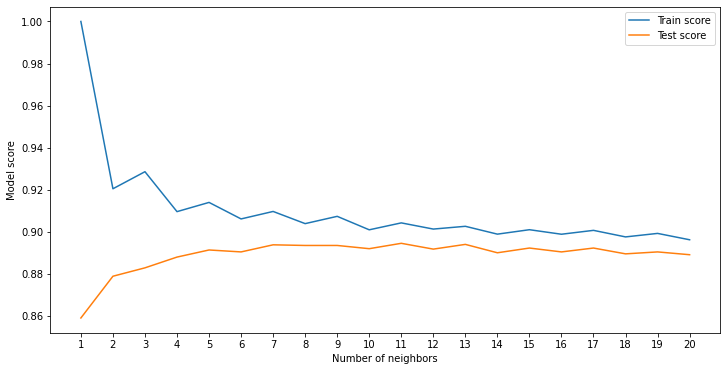

In [44]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

Here test score is best around i = 11 which is still less than 0.90

In [45]:

%%time
# Hyperparameter tuning with RandomisedSearchCV

log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

Wall time: 0 ns


In [51]:
%%time
# Setup random Seed

np.random.seed(42)

#Setup random hyperparameter search for LogisicRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose=True,
                               n_jobs=-1)
#Fit Random hyperparameter search model
rs_log_reg.fit(OH_x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 36.9 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 206.913808111479}

In [53]:
rs_log_reg.score(OH_x_test,y_test)

0.8642455242966752

In [54]:
%%time
#Setup random seed

np.random.seed(42)

#Setup Random Hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,
                          cv = 5,
                          n_iter=20,
                          verbose=True,
                          n_jobs=-1)
# Fit hyperparameter search model
rs_rf.fit(OH_x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 7min 2s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [55]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [56]:
rs_rf.score(OH_x_test,y_test)

0.9324808184143223

In [ ]:
rf_gs_grid = {"n_estimators": np.arange(450,550,10),
          "max_depth":[None],
          "min_samples_split":np.arange(8,18,2),
          "min_samples_leaf":np.arange(1,6,2)}

In [ ]:
%%time
gs_rf = GridSearchCV(RandomForestClassifier(),param_grid=rf_gs_grid,
                          cv = 2,
                          verbose=True,
                    n_jobs=-1)
# Fit hyperparameter search model
gs_rf.fit(OH_x_train,y_train)

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.score(OH_x_test,y_test)

From here we can observe that after using GridSearchCV, there is not a significant increase in model score.

### Evaluating classification model

In [58]:
y_preds = rs_rf.predict(OH_x_test)
y_preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [59]:
y_test

14668    0
24614    0
11096    0
10424    1
26007    1
        ..
30077    0
27898    0
22854    1
20557    0
27481    1
Name: loan_status, Length: 9775, dtype: int64

### ROC curve and AUC scores

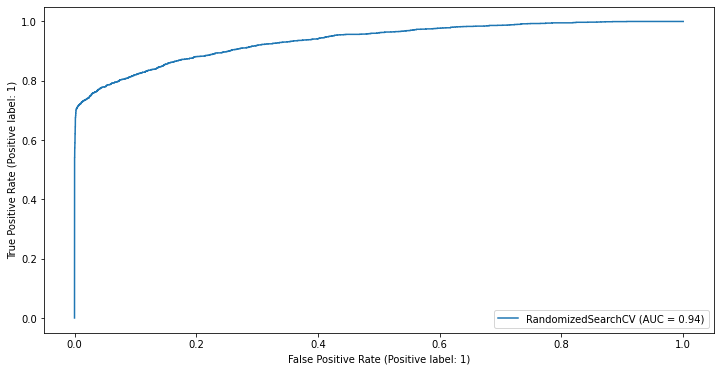

In [60]:
plot_roc_curve(rs_rf,OH_x_test,y_test)

In [61]:
# Confusion matrix

print(confusion_matrix(y_test,y_preds))

[[7578   35]
 [ 625 1537]]


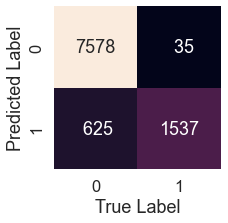

In [62]:
sns.set(font_scale=1.5) # increasing font size

def plot_conf_mat(y_test,y_preds):
    '''Plots a confusion matrix using heat map'''
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False,
                    fmt='4')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test,y_preds)

In [63]:
# Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7613
           1       0.98      0.71      0.82      2162

    accuracy                           0.93      9775
   macro avg       0.95      0.85      0.89      9775
weighted avg       0.94      0.93      0.93      9775



In [64]:
## Saving model
import pickle


In [66]:
with open('model_pkl','wb') as files:
    pickle.dump(rs_rf,files)

In [67]:
# load saved model
with open('model_pkl' , 'rb') as f:
    rf = pickle.load(f)

In [78]:
test = OH_x_test.loc[[14668]]


In [76]:
correct_out = y_test.loc[[14668]]
correct_out

14668    0
Name: loan_status, dtype: int64

In [79]:
rf.predict(test)

array([0], dtype=int64)

In [ ]:
output =  {'Actual Target' : y_test,
       'Predicted Target' : y_preds}
df = pd.DataFrame(output).reset_index(drop=True)
df.head()

In [ ]:
df.to_csv('FA_Output_Rohit',index=False)